## Pizza Sales Data Analysis

In [1]:
#--- Transform, clean data ---#
import pandas as pd
import numpy as np

#--- Manage Missing values ---#
import missingno as msno

#--- Data visualisation ---#
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importation du jeu de données
df_pizza = pd.read_excel("Pizza Sales.xlsx")

In [3]:
df_pizza.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


### Exploratory Data Analysis  ( EDA )
- Le dataset est composé de 48620 observations et 12 variables
- Les variables sont de type  int , float, datetime et object
- Il n'y a pas de valeurs manquantes

In [4]:
# Dimension du jeu de données
df_pizza.shape

(48620, 12)

In [5]:
df_pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [6]:
# Types des variables
df_pizza.dtypes

order_details_id              int64
order_id                      int64
pizza_id                     object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

In [7]:
df_pizza.dtypes.value_counts()

object            6
int64             3
float64           2
datetime64[ns]    1
dtype: int64

In [8]:
# Vérification de valeurs manquantes
df_pizza.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

<AxesSubplot:>

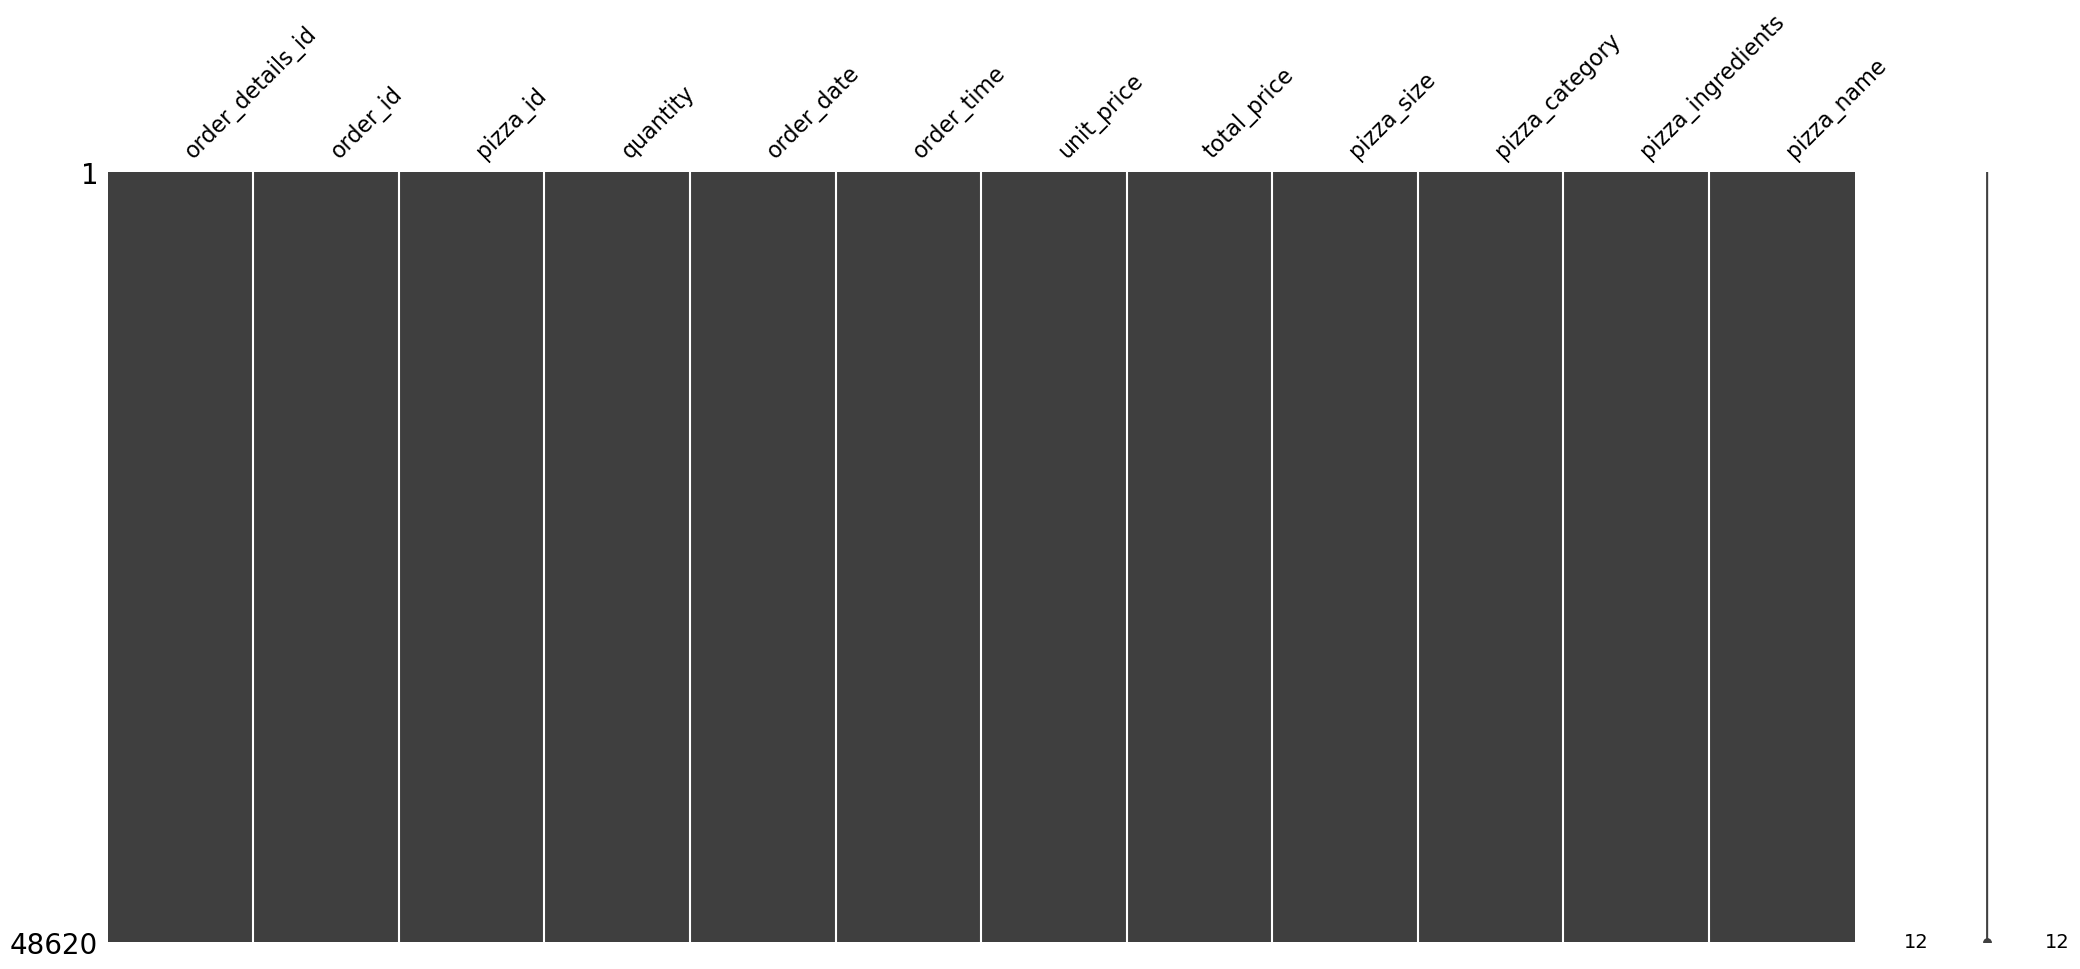

In [9]:
msno.matrix(df_pizza)

In [10]:
df_pizza.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


- Résumé statistique des variables en informant la moyenne, la variance, les quartiles etc...

In [11]:
# corrélation des variables
df_pizza.corr()

,order_details_id,order_id,quantity,unit_price,total_price
order_details_id,1.000000,0.999990,0.003639,-0.003286,-0.000847
order_id,0.999990,1.000000,0.003621,-0.003323,-0.000889
quantity,0.003639,0.003621,1.000000,0.007142,0.541926
unit_price,-0.003286,-0.003323,0.007142,1.000000,0.836087
total_price,-0.000847,-0.000889,0.541926,0.836087,1.000000


- Il y a une corrélation qui existe entre les variables. Certaines sont liées par une corrélation positive, d'autres par une corrélation
négtive.

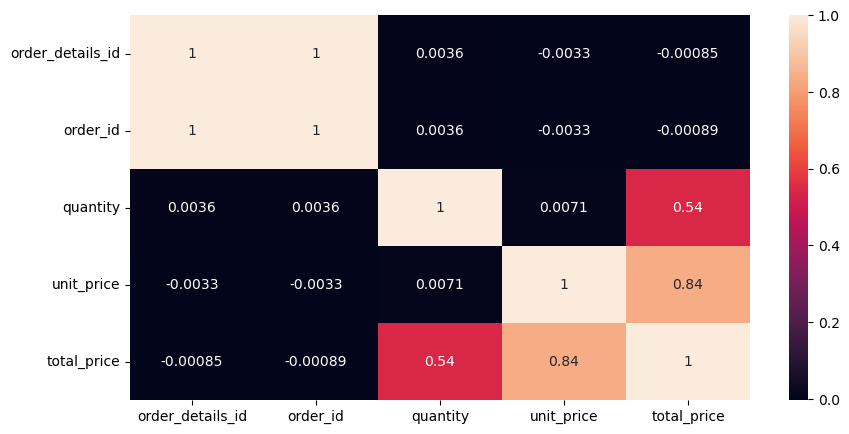

In [12]:
# matrice de corrélation
plt.figure(figsize=(10, 5))
sns.heatmap(df_pizza.corr(), annot= True)
plt.show()

### 2- Informations de base

a. Combien de pizzas uniques (pizza_id distincts) y a-t-il dans le jeu de
données 

In [14]:
nombre_pizza_unique = df_pizza["pizza_id"].nunique()
nombre_pizza_unique

91

b. Combien de commandes uniques (order_id distincts) figurent dans le jeu
de données ?

In [15]:
commandes_unique = df_pizza["order_id"].nunique()
commandes_unique

21350

### 3- Analyse temporelle

a. Quelle est la plage de dates dans le jeu de données ?

In [16]:
debut_date = df_pizza["order_date"].min()
fin_date = df_pizza["order_date"].max()
print(debut_date)
print(fin_date)

2015-01-01 00:00:00
2015-12-31 00:00:00


b. Combien de commandes ont été passées chaque jour ?

In [17]:
commande_journaliere = df_pizza.groupby('order_date').order_id.count()
commande_journaliere

order_date
2015-01-01    161
2015-01-02    160
2015-01-03    154
2015-01-04    106
2015-01-05    121
             ... 
2015-12-27     87
2015-12-28    102
2015-12-29     77
2015-12-30     73
2015-12-31    171
Name: order_id, Length: 358, dtype: int64

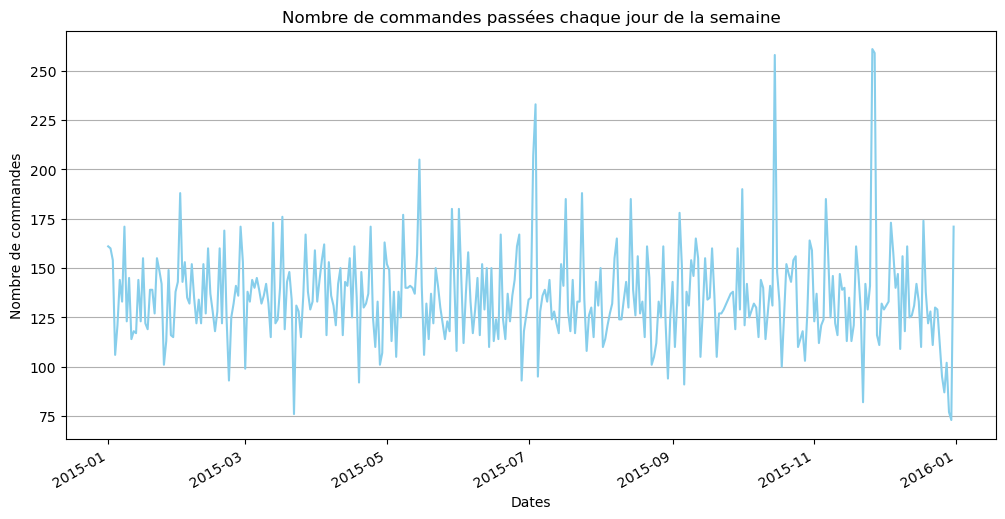

In [18]:
plt.figure(figsize=(12, 6))
commande_journaliere.plot(color='skyblue')
plt.title('Nombre de commandes passées chaque jour de la semaine')
plt.xlabel('Dates')
plt.ylabel('Nombre de commandes')
plt.grid(axis='y') 
plt.show()


### 4- Analyse de la quantité

a. Quelle est la quantité moyenne de pizzas commandées ?

In [19]:
quantite_moyenne_commande = round(df_pizza.quantity.mean())
quantite_moyenne_commande

1

b. Quelle est la taille de pizza la plus fréquemment commandée ?


In [48]:
taille_la_plus_commande = df_pizza.pizza_size.value_counts().idxmax()
taille_la_plus_commande

'L'

- La taille de pizza la plus fréquemment commandée est la taille L .

c. Quelle est la catégorie de pizza la plus fréquemment commandée 

In [49]:
categorie_la_plus_commande = df_pizza.pizza_category.value_counts().idxmax()

- La catégorie de pizza la plus fréquemment commandée est la catégorie classic

### 5- Analyse des prix

a. Quel est le prix unitaire moyen des pizzas ?

In [22]:
prix_unitaire_moyen = round(df_pizza.unit_price.mean(), 1)
prix_unitaire_moyen

16.5

b. Quel est le prix total moyen d'une commande ?

In [23]:
prix_total_moyen = round(df_pizza.total_price.mean(), 1)
prix_total_moyen

16.8

c. Quelle pizza a le prix unitaire le plus élevé ?

In [24]:
prix_unitaire_plus_eleve = df_pizza.groupby('pizza_category').unit_price.max().idxmax()
prix_unitaire_plus_eleve

'Classic'

In [25]:
df_pizza.groupby('pizza_name').unit_price.max().idxmax()

'The Greek Pizza'

- La pizza classic en particulier The Grek Pizza a le prix unitaire le plus élevé

### 6. Répartition par taille et catégorie

a. Combien de pizzas de chaque taille ont été vendues ?

In [26]:
pizza_vendu_par_taille = df_pizza.pizza_size.value_counts()
pizza_vendu_par_taille 

L      18526
M      15385
S      14137
XL       544
XXL       28
Name: pizza_size, dtype: int64

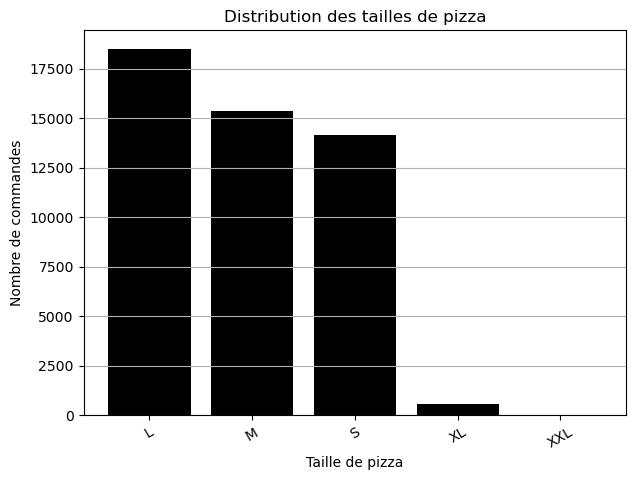

In [27]:
# Représentation graphique de pizzas vendues selon les tailles
tailles = df_pizza['pizza_size'].value_counts().index
nb_commandes = df_pizza['pizza_size'].value_counts().values

plt.figure(figsize=(7, 5))
plt.bar(tailles, nb_commandes, color='black')
plt.title('Distribution des tailles de pizza')
plt.xlabel('Taille de pizza')
plt.ylabel('Nombre de commandes')
plt.xticks(rotation=30)
plt.grid(axis='y') 
plt.show()


b. Combien de pizzas y a-t-il dans chaque catégorie ?

In [50]:
pizza_dans_chaque_categorie = df_pizza.pizza_category.value_counts()
pizza_dans_chaque_categorie

Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: pizza_category, dtype: int64

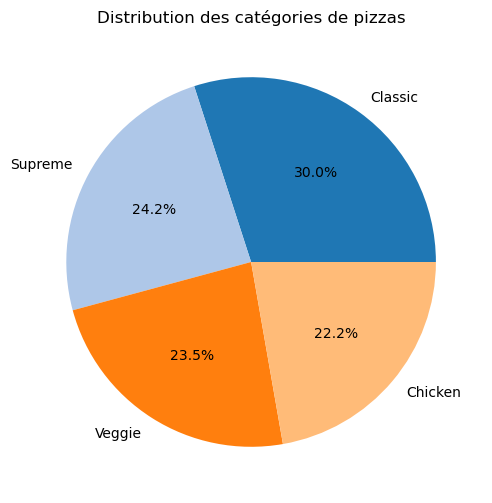

In [51]:
categories = df_pizza['pizza_category'].value_counts().index
nb_commandes = df_pizza['pizza_category'].value_counts().values

# Créer un diagramme circulaire pour représenter la distribution des catégories de pizzas
plt.figure(figsize=(6, 6))
plt.pie(nb_commandes, labels=categories, autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.title('Distribution des catégories de pizzas')
plt.show()

### 7- Analyse des ingrédients

a. Quels sont les ingrédients les plus couramment utilisés dans toutes les
pizzas ?

In [52]:
ingredients_plus_utilises = df_pizza.pizza_ingredients.value_counts().idxmax()
ingredients_plus_utilises

'Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon'

b. Combien de pizzas contiennent un ingrédient spécifique (par exemple,
pepperoni, champignons) ?

In [53]:
pizza_avec_ingredient_specifique = len(df_pizza[df_pizza['pizza_ingredients'] == 'Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic'])
pizza_avec_ingredient_specifique

1849

### 8- Détails de la commande

a. Quelle est la répartition du nombre de pizzas par commande 

In [54]:
nb_pizza_par_commande = df_pizza.groupby('order_id').order_id.count()
nb_pizza_par_commande = nb_pizza_par_commande.value_counts().sort_index()
nb_pizza_par_commande

1     8201
2     6196
3     3325
4     2888
5      144
6       75
7       75
8       83
9       65
10      59
11      69
12      71
13      52
14      38
15       7
21       2
Name: order_id, dtype: int64

b. Quelle est la répartition des prix totaux pour les commandes ?

In [55]:
repartition_prix_totaux = df_pizza.groupby('order_id')['total_price'].sum()
repartition_prix_totaux

order_id
1        13.25
2        92.00
3        37.25
4        16.50
5        16.50
         ...  
21346    62.25
21347    66.50
21348    46.70
21349    20.25
21350    12.75
Name: total_price, Length: 21350, dtype: float64

### 9. Analyse du chiffre d'affaires en fonction du temps 

a. Quel est le chiffre d'affaires quotidien ?

In [56]:
chiffre_aff_journalier = df_pizza.groupby('order_date')['total_price'].sum()
chiffre_aff_journalier

order_date
2015-01-01    2713.85
2015-01-02    2731.90
2015-01-03    2662.40
2015-01-04    1755.45
2015-01-05    2065.95
               ...   
2015-12-27    1419.00
2015-12-28    1637.20
2015-12-29    1353.25
2015-12-30    1337.80
2015-12-31    2916.00
Name: total_price, Length: 358, dtype: float64

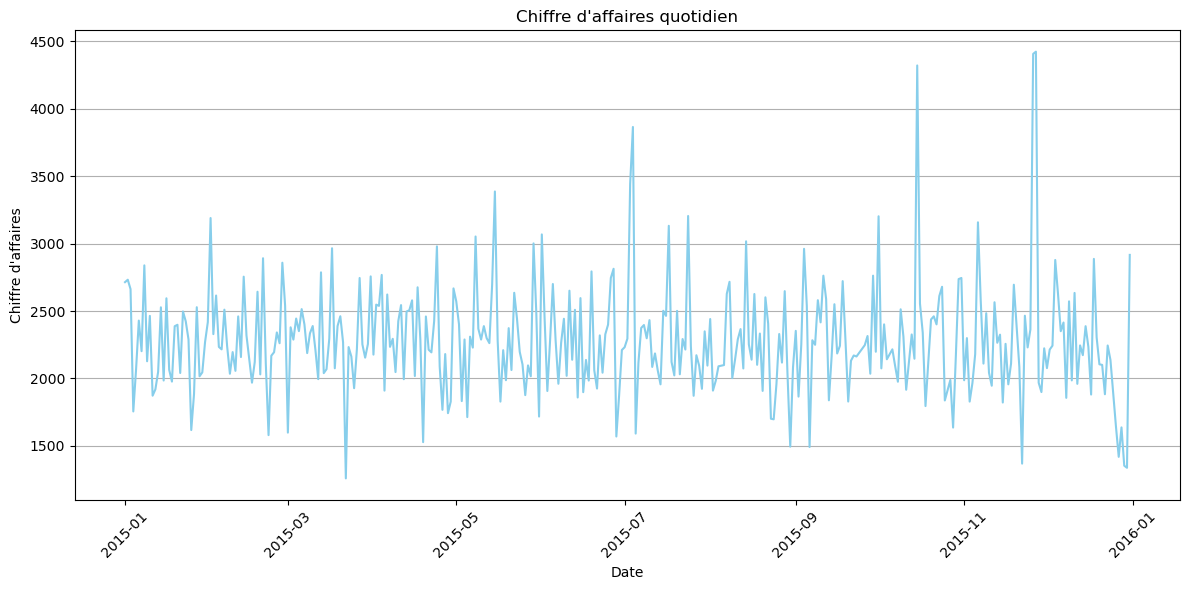

In [57]:
# Représentation graphique
chiffre_affaires_quotidien = df_pizza.groupby('order_date')['total_price'].sum()

plt.figure(figsize=(12, 6))
plt.plot(chiffre_affaires_quotidien.index, chiffre_affaires_quotidien.values, color='skyblue')
plt.title('Chiffre d\'affaires quotidien')
plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaires')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


b. Y a-t-il une corrélation entre l'heure de la journée et le total de la
commande ?


### 10- Pizzas populaires

a. Quelles sont les 5 pizzas les plus commandées en quantité ?

In [59]:
pizza_plus_commande =df_pizza.groupby('pizza_name')['quantity'].count()
pizza_plus_commande = pizza_plus_commande.sort_values(ascending=False).head(5)
pizza_plus_commande

pizza_name
The Classic Deluxe Pizza      2416
The Barbecue Chicken Pizza    2372
The Hawaiian Pizza            2370
The Pepperoni Pizza           2369
The Thai Chicken Pizza        2315
Name: quantity, dtype: int64

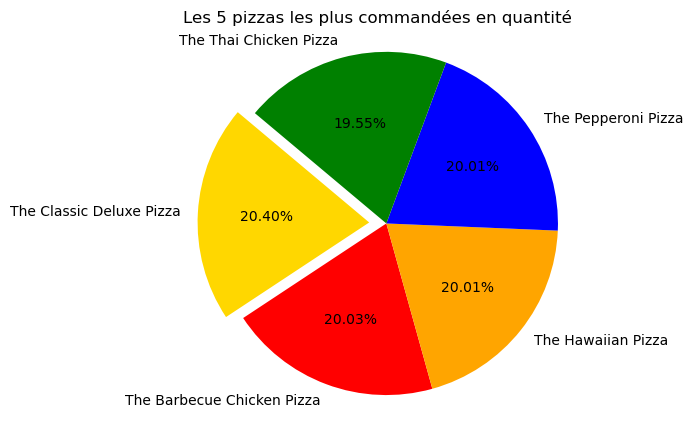

In [60]:
labels = pizza_plus_commande.index  
sizes = pizza_plus_commande.values  
colors = ['gold', 'red', 'orange', 'blue', 'green'] 
explode = (0.1, 0, 0, 0, 0)  

plt.figure(figsize=(5, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)

plt.title('Les 5 pizzas les plus commandées en quantité')

plt.axis('equal')  # Assure que le pie chart est dessiné en forme de cercle
plt.show()


b. Quelles sont les 5 pizzas les plus commandées en termes de chiffre
d'affaires ?

In [61]:
pizza_par_chiffre_daffaire = df_pizza.groupby('pizza_name')['total_price'].sum().sort_values(ascending=False).head(5)
pizza_par_chiffre_daffaire

pizza_name
The Thai Chicken Pizza          43434.25
The Barbecue Chicken Pizza      42768.00
The California Chicken Pizza    41409.50
The Classic Deluxe Pizza        38180.50
The Spicy Italian Pizza         34831.25
Name: total_price, dtype: float64

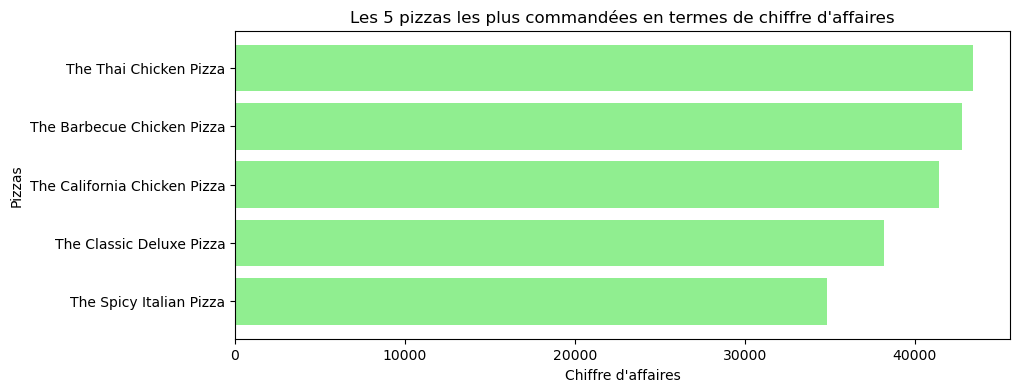

In [62]:
# Représentation graphique

pizzas = pizza_par_chiffre_daffaire.index 
chiffre_affaires = pizza_par_chiffre_daffaire.values  

plt.figure(figsize=(10, 4))
plt.barh(pizzas, chiffre_affaires, color='lightgreen')
plt.xlabel('Chiffre d\'affaires')
plt.ylabel('Pizzas')
plt.title('Les 5 pizzas les plus commandées en termes de chiffre d\'affaires')
plt.gca().invert_yaxis()  
plt.show()


### 11- Chiffre d'affaires par taille et catégorie

a. Quelle est la répartition du chiffre d'affaires pour chaque taille de pizza ?

In [63]:
chiffre_daffaire_par_taille = df_pizza.groupby('pizza_size')['total_price'].sum()
chiffre_daffaire_par_taille

pizza_size
L      375318.70
M      249382.25
S      178076.50
XL      14076.00
XXL      1006.60
Name: total_price, dtype: float64

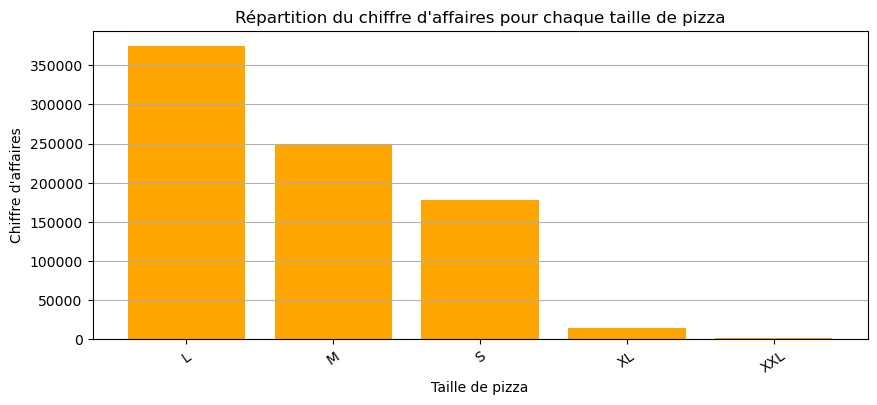

In [64]:
tailles_pizza = chiffre_daffaire_par_taille.index
chiffre_affaires = chiffre_daffaire_par_taille.values

plt.figure(figsize=(10, 4))
plt.bar(tailles_pizza, chiffre_affaires, color='orange')
plt.xlabel('Taille de pizza')
plt.ylabel('Chiffre d\'affaires')
plt.title('Répartition du chiffre d\'affaires pour chaque taille de pizza')
plt.xticks(rotation=35)
plt.grid(axis='y') 
plt.show()


### 12 - Corrélation entre prix et quantité

a. Y a-t-il une corrélation entre le prix unitaire et la quantité commandée ?


In [65]:
df_pizza[['unit_price', 'quantity']].corr()

,unit_price,quantity
unit_price,1.000000,0.007142
quantity,0.007142,1.000000


- Il y'a une corrélation entre le prix unitaire et la quantité commandée.La corrélation étant positive, l'on peut dire que ces deux variables varient dans le méme sens et le coefficient de corrélation est estimé à 0.007142 .

b. Quel est le prix unitaire moyen pour différentes tailles de pizza ?


In [66]:
prix_unitaire_moyen_par_taille = df_pizza.groupby('pizza_size')['unit_price'].mean()
prix_unitaire_moyen_par_taille

pizza_size
L      19.802553
M      15.951219
S      12.364328
XL     25.500000
XXL    35.950000
Name: unit_price, dtype: float64

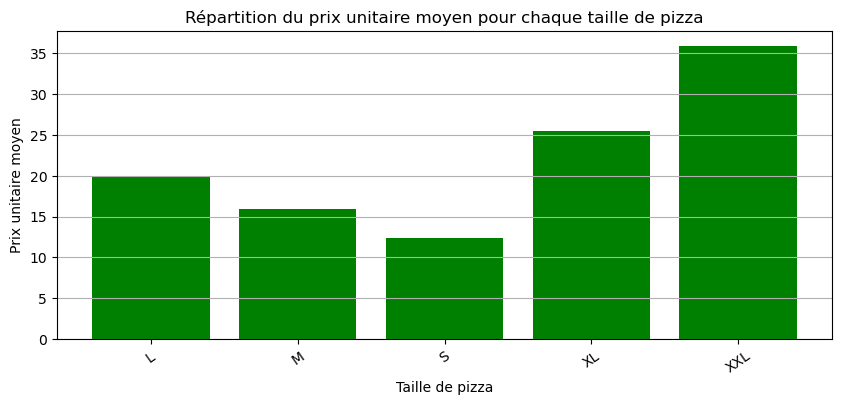

In [67]:
# Représentation graphique

taille_pizzas = prix_unitaire_moyen_par_taille.index
prix_unitaire= prix_unitaire_moyen_par_taille.values

plt.figure(figsize=(10, 4))
plt.bar(taille_pizzas, prix_unitaire, color='green')
plt.xlabel('Taille de pizza')
plt.ylabel('Prix unitaire moyen')
plt.title('Répartition du prix unitaire moyen pour chaque taille de pizza')
plt.xticks(rotation=35)
plt.grid(axis='y') 
plt.show()

### 13- Tendances saisonnières

a. Y a-t-il des tendances saisonnières dans les commandes de pizza ?


In [68]:
df_pizza['months'] = df_pizza['order_date'].dt.month_name()

In [69]:
commande_by_month = df_pizza.groupby('months')['order_id'].count()
commande_by_month

months
April        4067
August       4094
December     3859
February     3892
January      4156
July         4301
June         4025
March        4186
May          4239
November     4185
October      3797
September    3819
Name: order_id, dtype: int64

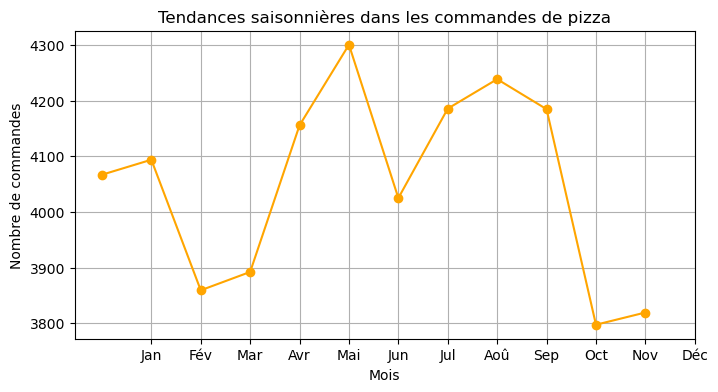

In [70]:
# Représentation graphique

plt.figure(figsize=(8, 4))
commande_by_month.plot(kind='line', marker='o', color='orange')
plt.title('Tendances saisonnières dans les commandes de pizza')
plt.xlabel('Mois')
plt.ylabel('Nombre de commandes')
plt.xticks(range(1, 13), ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Jun', 'Jul', 'Aoû', 'Sep', 'Oct', 'Nov', 'Déc'])
plt.grid(True)
plt.show()

b. Y a-t-il une corrélation entre le jour de la semaine et la quantité de
commandes ?


In [71]:
df_pizza['day_of_week'] = df_pizza['order_date'].dt.day_name()

In [74]:
commande_by_day = df_pizza.groupby('day_of_week')['order_id'].count()
commande_by_day

day_of_week
Friday       8106
Monday       6369
Saturday     7355
Sunday       5917
Thursday     7323
Tuesday      6753
Wednesday    6797
Name: order_id, dtype: int64

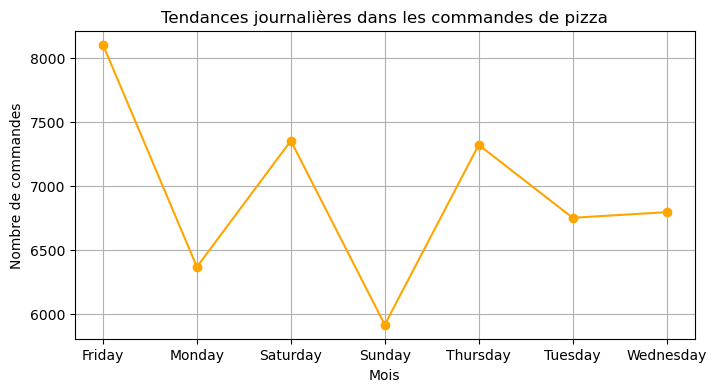

In [75]:
# Représentation graphique

plt.figure(figsize=(8, 4))
commande_by_day.plot(kind='line', marker='o', color='orange')
plt.title('Tendances journalières dans les commandes de pizza')
plt.xlabel('Mois')
plt.ylabel('Nombre de commandes')
plt.grid(True)
plt.show()

- Il y a bien une corrélation entre les jours de la semaine et la quantité de commandes.
- Là on constate que Jeudi, Vendredi et Samedi sont les jours ou il y a plus de commandes